In [13]:
import osmnx as ox
import matplotlib.pyplot as plt

In [2]:
def download_footprints(west, south, east, north,footprints_type = 'landuse'):
    poly = ox.bbox_to_poly(north,south,east,west)
    footprints_gdf = ox.footprints_from_polygon(poly,footprint_type=footprints_type)
    
    return footprints_gdf


def filter_footprints(footprints_gdf, footprints_type = 'landuse', chosenFootprints = ['farmland','forest','grass','meadow']):
    filtered_gdf = footprints_gdf.loc[footprints_gdf[footprints_type].isin(chosenFootprints)]
    
    return filtered_gdf


def show_footprints(footprints_gdf):
    fig,ax = ox.plot_footprints(footprints_gdf,bbox=filtered_gdf)


In [39]:
west, south, east, north = 18.5685998807,50.8595154681,18.5807532856,50.8629457573

In [40]:
footprints_landuse_gdf = download_footprints(west,south,east,north)

In [41]:
footprints_landuse_gdf.landuse.unique()

array(['basin', 'meadow', 'farmland', 'farmyard', 'grass'], dtype=object)

In [42]:
filtered_footprints_landuse_gdf = filter_footprints(footprints_landuse_gdf)

In [43]:
filtered_footprints_landuse_gdf.landuse.unique()

array(['meadow', 'farmland', 'grass'], dtype=object)

In [44]:
forest_footprints = filtered_footprints_landuse_gdf[filtered_footprints_landuse_gdf['landuse']=='forest']
farmland_footprints = filtered_footprints_landuse_gdf[filtered_footprints_landuse_gdf['landuse']=='farmland']
meadow_footprints = filtered_footprints_landuse_gdf[filtered_footprints_landuse_gdf['landuse']=='meadow']
grass_footprints = filtered_footprints_landuse_gdf[filtered_footprints_landuse_gdf['landuse']=='grass']

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


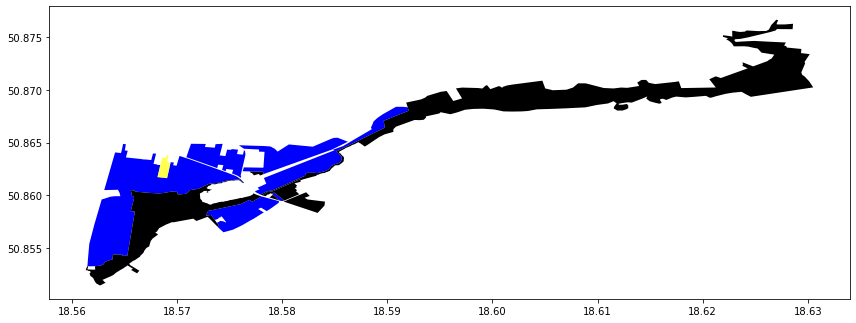

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot forests
forest_footprints.plot(ax=ax, facecolor='green')

# Plot farmlands
farmland_footprints.plot(ax=ax, facecolor="blue")

# Plot meadows
meadow_footprints.plot(ax=ax, facecolor="black")

# Plot grass
grass_footprints.plot(ax=ax, facecolor='yellow', alpha=0.7)

plt.tight_layout()

In [ ]:
#df.to_csv(r'C:\Users\dnsta\Desktop\MGSTR\CSV Tests\File Name.csv')